# Explore here

In [2]:
!pip install missingno lazypredict
!pip install statsmodels
!pip install imbalanced-learn
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 26.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 70.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 57.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 64.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.model_selection import GridSearchCV
import joblib
import os
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

1. Cargar el conjunto de datos del proyecto anterior, realizar un EDA, y dividir la muestra de entrenamiento y de prueba.

In [4]:
#1) Descargo los datos de diabetes:

#a) Leo los datos de la URL.
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

#b) Guardo los datos en un DataFrame.
df = pd.read_csv(url)

#c) Miro las primeras filas del DF.
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Tamaño de la muestra.
df.shape   # La BD tiene 768 filas y 9 columnas.

# Información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Cuento el número de valores únicos en cada columna del DF.
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

No hay variables que sean constantes

In [7]:
# Evaluo la incidencia de los valores perdidos en cada una de las variables (Nan).
df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Ninguna de las variables tiene NaN

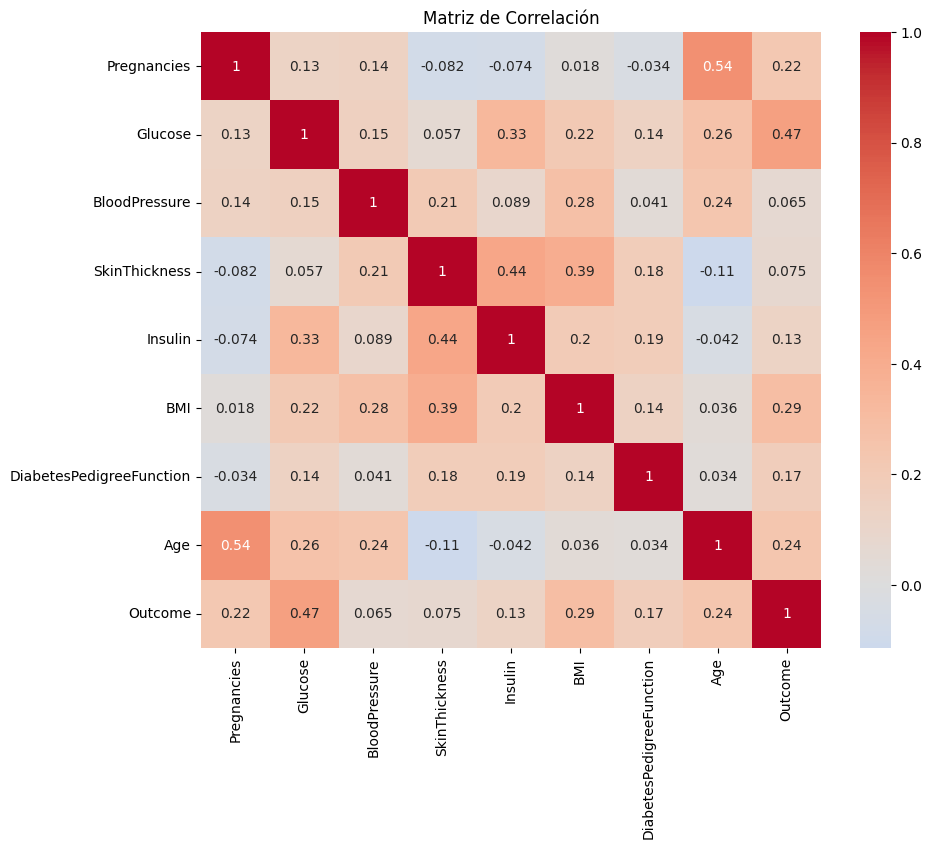

In [8]:
# Anñalisis de correlación
correlation_matrix = df.corr()

# Grafico mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

No se observa que las variables de la matriz X estén correlacionadas entre sí. 

In [9]:
# Análisis descriptivo de la muestra.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


BMI:

-Los valores mínimos y máximos de BMI son iguales a 0 y 67.10. Estos valores tan extremos hace pensar que existen valores atípicos en la muestra.

-Al parecer las personas con hiperobesidad tienen un IMC mayor que 60. Dado que considero que puede existir relación entre la obesidad y la diabetes, he preferido no eliminar estas observaciones de la muestra. 

PREGNANCIES:

-El valor máximo de embarazos es 17. Es un valor muy elevado y casi imposible de creer, por lo que evidencia la existencia de un posible error en la toma de los datos.


Análisis BMI:

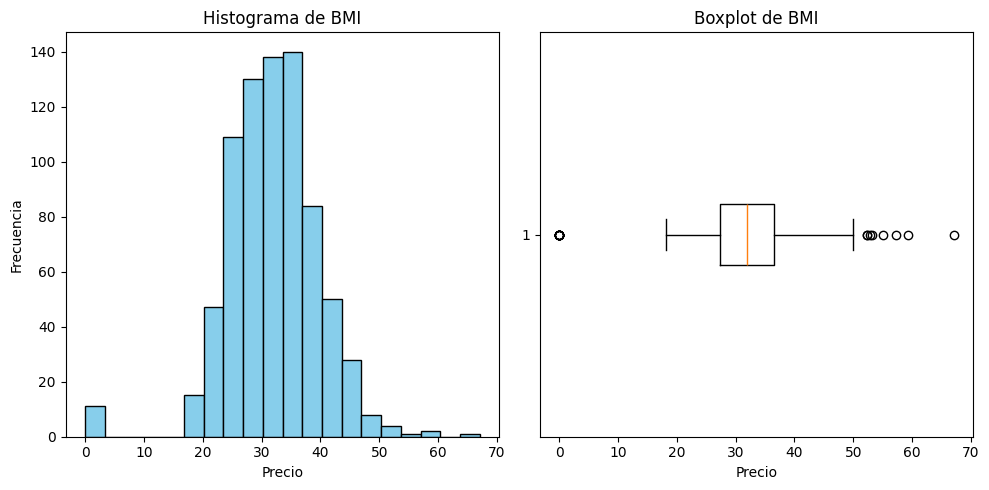

In [10]:
# Creo una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Creo un histograma en el primer subplot
ax[0].hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de BMI')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Creo un boxplot en el segundo subplot
ax[1].boxplot(df['BMI'], vert=False)
ax[1].set_title('Boxplot de BMI')
ax[1].set_xlabel('Precio')

# Muestro la figura
plt.tight_layout()
plt.show()

In [11]:
# Consulto qué observaciones tienen un BMI cercano a cero. Para ello, y viendo el gráfico, establezco la restricción de que tomen valores menores a 10.
bmi_bajo = df[df['BMI'] < 10]
print(bmi_bajo.index)

Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64')


In [12]:
# Me quedo con los id que tienen un BMI mayor que 10.
df = df[df['BMI'] >= 10]

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,757.0,3.844122,3.369959,0.000,1.000,3.000,6.000,17.00
Glucose,757.0,121.136063,32.061428,0.000,99.000,117.000,141.000,199.00
BloodPressure,757.0,69.690885,18.283325,0.000,64.000,72.000,80.000,122.00
SkinThickness,757.0,20.774108,15.908567,0.000,0.000,23.000,32.000,99.00
Insulin,757.0,80.841480,115.710818,0.000,0.000,37.000,130.000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.500,32.300,36.600,67.10
DiabetesPedigreeFunction,757.0,0.472437,0.329474,0.078,0.244,0.376,0.627,2.42
Age,757.0,33.281374,11.697752,21.000,24.000,29.000,41.000,81.00
Outcome,757.0,0.351387,0.477719,0.000,0.000,0.000,1.000,1.00


Se han eliminado correctamente los valores atípicos inferiores de la muestra.

Análisis PREGNANCIES

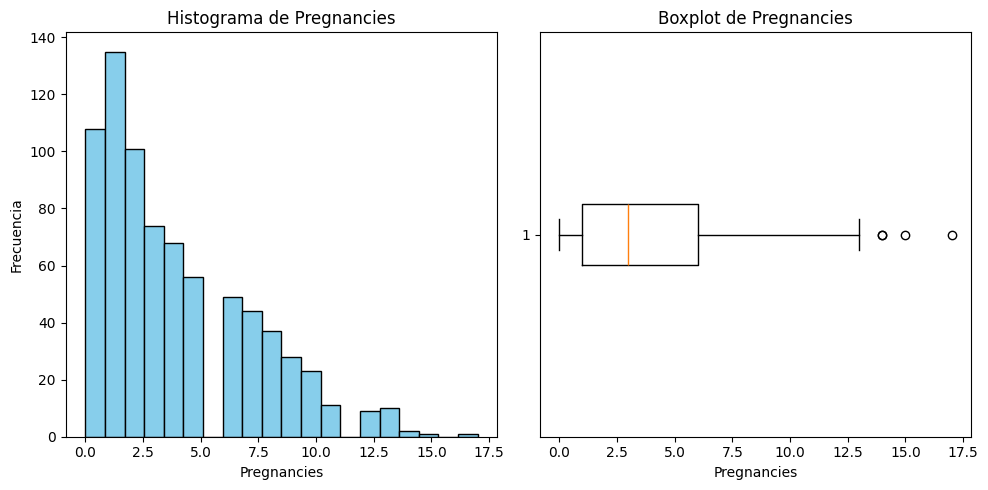

In [14]:
# Creo una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Creo un histograma en el primer subplot
ax[0].hist(df['Pregnancies'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Pregnancies')
ax[0].set_xlabel('Pregnancies')
ax[0].set_ylabel('Frecuencia')

# Creo un boxplot en el segundo subplot
ax[1].boxplot(df['Pregnancies'], vert=False)
ax[1].set_title('Boxplot de Pregnancies')
ax[1].set_xlabel('Pregnancies')

# Muestro la figura
plt.tight_layout()
plt.show()

In [15]:
# Creo un df en el que ordeno la variable Pregnancies de mayor a menor.
df_sorted = df.sort_values(by='Pregnancies', ascending=False)

# Creo un df con las variables Pregnancies y Age, siguiendo el orden del df anterior.
df_selected = df_sorted[['Pregnancies', 'Age']]

# Muestro la tabla de datos ordenados.
print(df_selected.head(30))

     Pregnancies  Age
159           17   47
88            15   43
455           14   38
298           14   46
357           13   44
323           13   43
635           13   38
691           13   44
274           13   52
744           13   39
28            13   57
72            13   42
86            13   45
518           13   41
745           12   46
510           12   46
215           12   38
375           12   58
436           12   41
254           12   44
582           12   62
358           12   48
333           12   44
24            11   51
590           11   45
614           11   50
36            11   35
740           11   48
558           11   42
559           11   35


Tras analizar los datos, observo que es común que haya mujeres con un elevado número de hijos. Asimismo, analizo las edades de estas mujeres para ver que no haya ningún posible error en los datos, es decir, mujeres muy jóvenes con muchos hijos. Por lo tanto, considero que lo más adecuado es mantener estas observaciones en la muestra.

In [16]:
# Muestro la distribución de la variable dependiente "Outcome".
df.Outcome.value_counts()

Outcome
0    491
1    266
Name: count, dtype: int64

La distribución de la variable muestra que hay 491 pacientes sin diabetes y 266 con diabetes. 

In [17]:
# Divido el conjunto de datos en Train y Test.
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df.Outcome, test_size=0.2, random_state=42)

2. Construir un Random Forest.

In [18]:
# Genero dos modelos de random forest de clasificacion, uno simple y otro complejo y les paso los datos de entrenamiento
simple_rf = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2, min_samples_leaf=20)
complex_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1)

simple_rf.fit(X_train, y_train)
complex_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [19]:
# Realizo las predicciones y visualizo 
y_simplerf_pred_train = simple_rf.predict(X_train)
y_simplerf_pred_test = simple_rf.predict(X_test)
print(y_simplerf_pred_test)

y_complexrf_pred_train = complex_rf.predict(X_train)
y_complexrf_pred_test = complex_rf.predict(X_test)
y_simplerf_pred_test

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0]


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

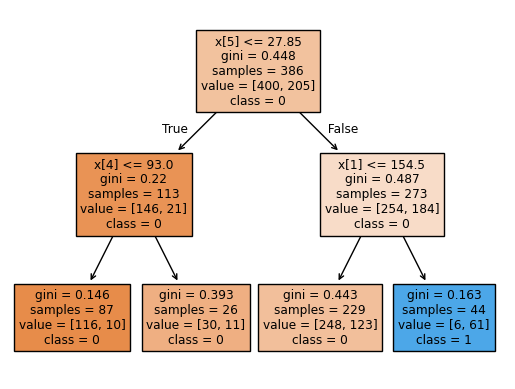

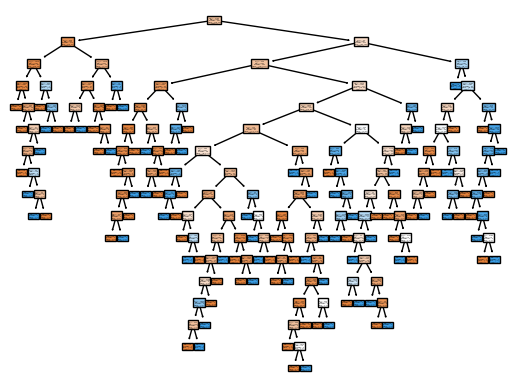

In [20]:
tree.plot_tree(simple_rf.estimators_[0], class_names = ["0", "1", "2"], filled = True)
plt.show()
tree.plot_tree(complex_rf.estimators_[0], class_names = ["0", "1", "2"], filled = True)
plt.show()

In [21]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)
    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)
    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity
    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])
    return metrics_df

In [22]:
get_metrics(y_train, y_test, y_complexrf_pred_train, y_complexrf_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.0,1.00000
Test,0.763158,0.647059,0.727835,0.702128,0.6,0.85567
Diferencia,0.236842,0.352941,0.272165,0.297872,0.4,0.14433


Los resultados muestran que hay overfitting. Podemos observar que, mientras que en el conjunto de entrenamiento las métricas son perfectas, en el conjunto de prueba las métricas presentan valores mucho más bajos. Por lo tanto, podemos afirmar que el modelo ha aprendido demasiado bien los patrones específicos del conjunto de entrenamiento y no generaliza bien sobre el conjunto de prueba.

Para solventar este problema sería aconsejable ajustar los hiperparámetros del modelo o valorar otros modelos más adecuados a los datos.

3. Construir un Boosting

In [ ]:
# Entrenamiento inicial del modelo con parámetros por defecto
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [25]:
# Predicciones iniciales y precisión
y_pred = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Model Accuracy: {initial_accuracy:.2f}")
print(classification_report(y_test, y_pred))


Initial Model Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        97
           1       0.62      0.58      0.60        55

    accuracy                           0.72       152
   macro avg       0.69      0.69      0.69       152
weighted avg       0.71      0.72      0.72       152



In [ ]:
# Optimización de hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}


In [27]:
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [28]:
# Resultados del mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Model Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_accuracy:.2f}")

Best Model Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.80


In [ ]:
# Evaluación del mejor modelo en el conjunto de test
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final Model Accuracy on Test Set: {final_accuracy:.2f}")
print(classification_report(y_test, y_pred_best))

Final Model Accuracy on Test Set: 0.71
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        97
           1       0.60      0.62      0.61        55

    accuracy                           0.71       152
   macro avg       0.69      0.69      0.69       152
weighted avg       0.71      0.71      0.71       152



El modelo predice bien la clase 0, pero tiene un rendimiento más bajo en la clase 1, con menor precisión y sensibilidad. Esto podría indicar que la clase 1 tiene menos representación en el conjunto de datos o características menos distinguibles.

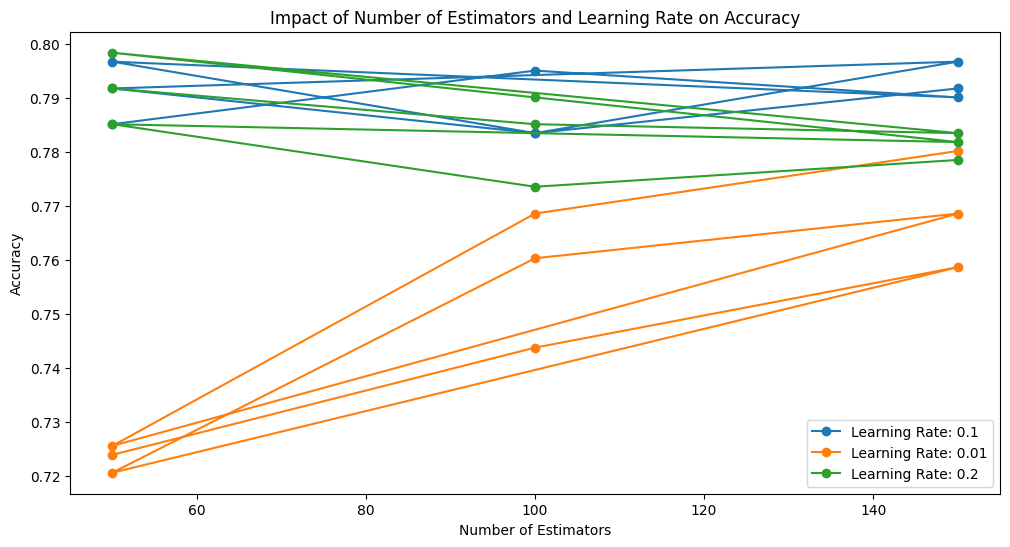

In [ ]:
# Gráfico de precisión con distintos hiperparámetros
results = grid_search.cv_results_
param_learning_rate = results['param_learning_rate'].data
param_n_estimators = results['param_n_estimators'].data
mean_test_score = results['mean_test_score']

plt.figure(figsize=(12, 6))
for lr in set(param_learning_rate):
    plt.plot(
        param_n_estimators[param_learning_rate == lr],
        mean_test_score[param_learning_rate == lr],
        marker='o',
        label=f'Learning Rate: {lr}'
    )
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Estimators and Learning Rate on Accuracy')
plt.legend()
plt.show()

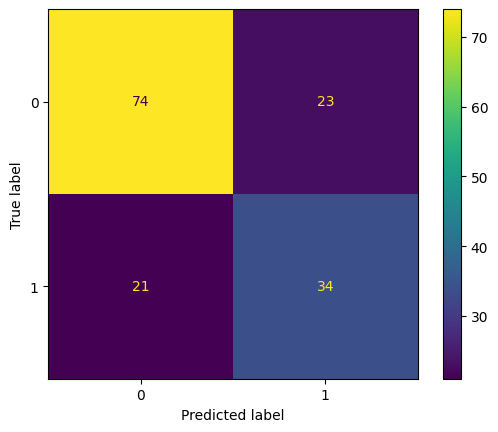

In [ ]:
# Matriz de Confusión del mejor modelo
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

4. Guardar el modelo

In [ ]:
# Creo la carpeta 'models' 
os.makedirs('models', exist_ok=True)

# Ruta donde se guardará el modelo
model_path = 'models/final_gradient_boosting_model.pkl'

# Guardao el modelo en la ruta especificada
joblib.dump(best_model, model_path)

print(f"Modelo guardado en: {model_path}")


Modelo guardado en: models/final_gradient_boosting_model.pkl


5. Elección del mejor modelo

1. Precisión en el conjunto de prueba (Accuracy)

Árbol de Decisión: 0.75

Random Forest: 0.76

Boosting: 0.71

Mejor modelo: Random Forest tiene la mayor precisión en el conjunto de prueba, seguido de cerca por el Árbol de Decisión. Boosting es el más bajo.

2. F1-Score en el conjunto de prueba

Árbol de Decisión: 0.65

Random Forest: 0.65

Boosting:

Clase 0: 0.77

Clase 1: 0.61

Media Ponderada: 0.71

Mejor modelo: Boosting obtiene la mayor media ponderada (0.71) en el F1-score, lo que indica un balance entre precisión y sensibilidad superior al Árbol de Decisión y Random Forest.

3. AUC en el conjunto de prueba

Árbol de Decisión: 0.73

Random Forest: 0.73

Boosting: 0.69 (Macro avg)

Mejor modelo: Ambos, Árbol de Decisión y Random Forest, tienen un AUC de 0.73 en el conjunto de prueba, ligeramente superior al de Boosting.

4. Precisión (Precision) en el conjunto de prueba

Árbol de Decisión: 0.66

Random Forest: 0.70

Boosting:

Clase 0: 0.78

Clase 1: 0.60

Media Ponderada: 0.71

Mejor modelo: Boosting tiene la mayor precisión promedio ponderada (0.71), aunque Random Forest también tiene un buen desempeño.

5. Sensibilidad (Recall) en el conjunto de prueba

Árbol de Decisión: 0.64

Random Forest: 0.60

Boosting:

Clase 0: 0.76

Clase 1: 0.62

Media Ponderada: 0.71

Mejor modelo: Boosting sobresale con una mejor sensibilidad promedio ponderada (0.71).

6. Especificidad en el conjunto de prueba (solo para Random Forest)

Random Forest: 0.86

7. Diferencia entre el rendimiento en Train y Test (Overfitting)

Árbol de Decisión: Muestra una diferencia relativamente baja entre el conjunto de entrenamiento y de prueba, lo que indica un modelo con buen ajuste.

Random Forest: Tiene una diferencia notable entre entrenamiento y prueba (especialmente en F1-score y precisión), lo cual indica sobreajuste.

Boosting: Aunque no tengo la diferencia explícita, Boosting parece estar menos ajustado al conjunto de entrenamiento comparado con Random Forest.

CONCLUSIÓN: Boosting es el modelo más equilibrado y el que mejor maneja el balance entre clases, con mejor desempeño en F1-score ponderado, precisión y sensibilidad promedio.
